In [1]:
from simulation_enviroment import DemandResponseEviroment
from policies import *
from noise_functions import gaussian_stochastic,identity
from pricing_generators import *
from reward_functions import *
import sys

In [2]:
%matplotlib inline

In [15]:
def reward_function(s, cells):
    return boundary_exceedence_cost(s, cells)
    return energy_price_cost(s, cells) + switch_cost(s, cells) + boundary_exceedence_cost(s, cells)

In [16]:
length = 1440
sys.setrecursionlimit(length * 10)

In [17]:
gamma = -1 * (1/length - 1)
gamma = 0.8
print(gamma)

0.8


In [18]:
env =  DemandResponseEviroment(episode_length=length * 2,  noise_function=identity, 
                               pricing_generator=ApxShiftPricingGenerator)

In [19]:
p = QLearningRfPolicy(alpha=0.4, gamma=gamma, epsilon=0.99, length = length)

In [20]:
rewards = []
def play(p, t, update = True):
    if t > length * 2 + 1:
        return 0
    s , cells = env.get_global_state(), env.cells
    action = p.policy(s, cells)
    env.execute_action(action)
    ns , ncells = env.get_global_state(), env.cells
    reward = reward_function(ns, ncells) + gamma  * play(p, t + 1, update)
    if t < length:
        if update:
            p.update(s, cells, action, ns, ncells, reward)
        rewards.append(reward)
    return reward

In [21]:
iters = 50
avg_rewards = []
for i in range(iters):
    if not i % 10:
        print('Starting iter..', i)
    env.start_episode(visualise=False)
    play(p, 0)
    avg_rewards.append(sum(rewards)/len(rewards))
    rewards = []

Starting iter.. 0
Starting iter.. 10
Starting iter.. 20
Starting iter.. 30
Starting iter.. 40


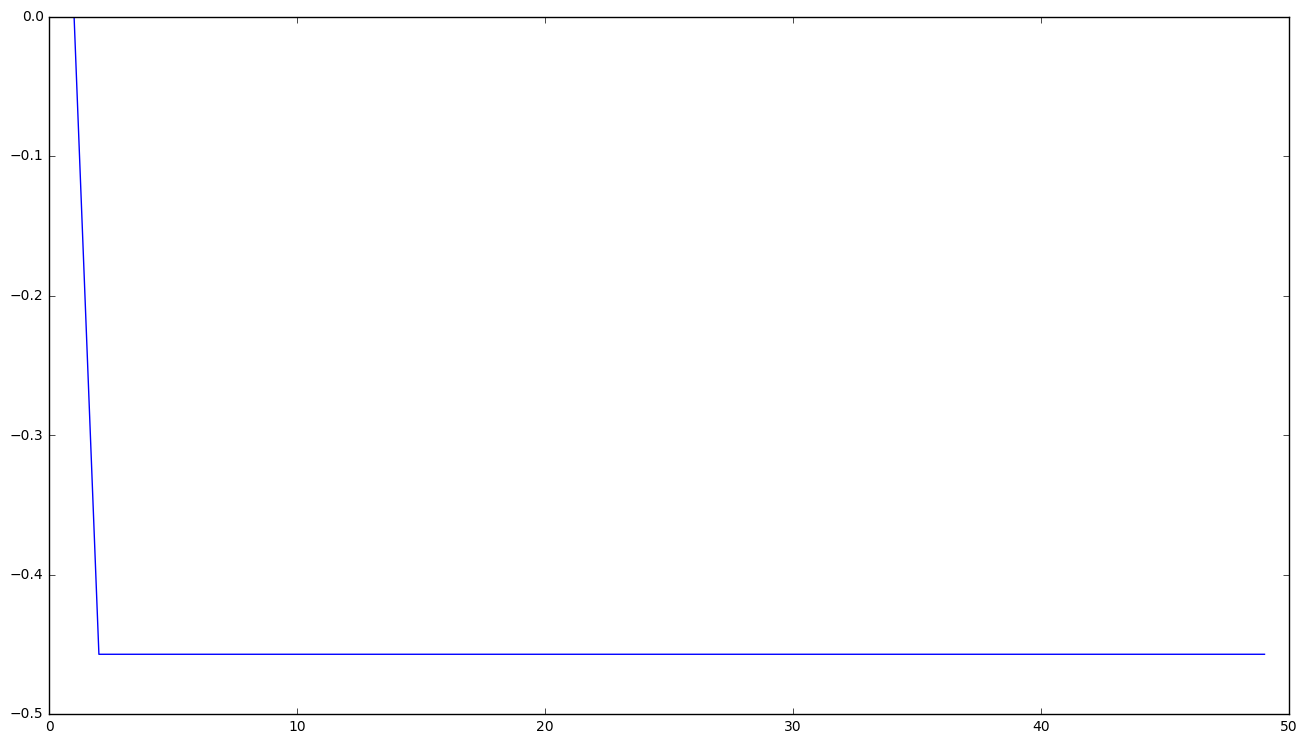

In [22]:
f = plt.figure()
f.set_size_inches(16, 9)
_ = plt.plot(avg_rewards)

VISUALISING


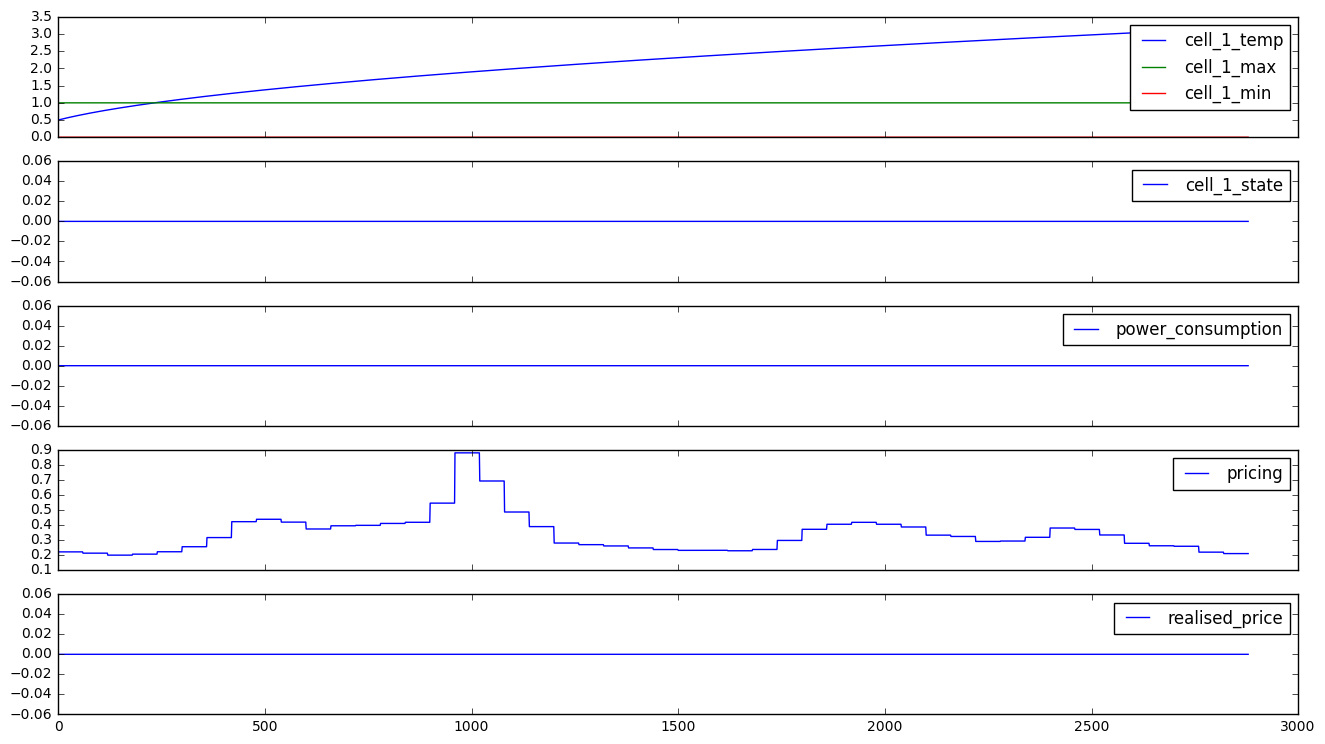

-0.45686765919067196


In [23]:
rewards = []
env.start_episode(visualise=True)
play(p, 0, update=False)
print(sum(rewards)/len(rewards))

VISUALISING


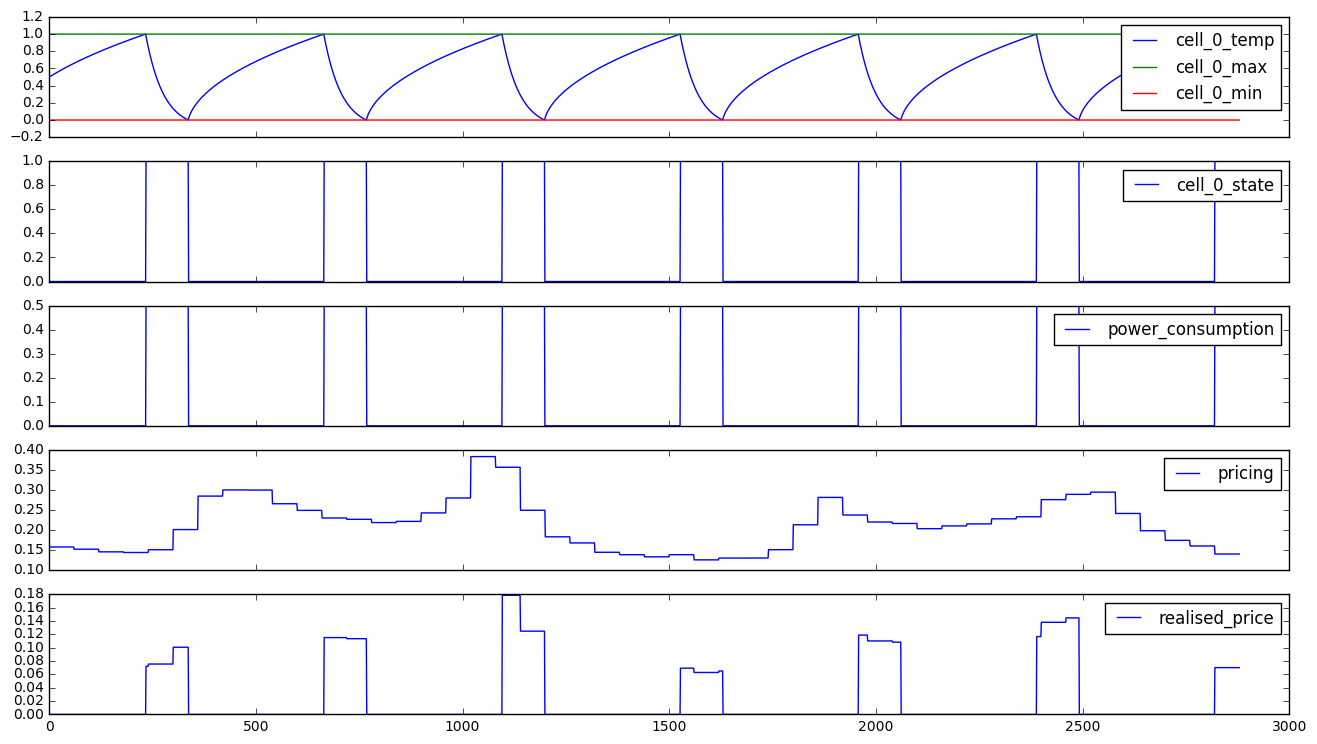

0.0483452958057


In [12]:
qp = LatestSwitchPolicy(reward_function)
rewards = []
env.start_episode(visualise=True)
play(qp, 0, update=False)
print(sum(rewards)/len(rewards))

In [13]:
p.qvalues

AttributeError: 'QLearningRfPolicy' object has no attribute 'qvalues'

In [14]:
p.epsilon

-4.77399999999993